# Sales Analysis Project: Superstore Sales Dataset

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

Upload the dataset CSV to your notebook environment or provide correct path

In [7]:
data = pd.read_csv('train.csv')


Explore Dataset

In [8]:
print("Dataset Shape:", data.shape)
print("\nColumns:\n", data.columns)
print("\nFirst 5 rows:\n", data.head())

Dataset Shape: (9800, 18)

Columns:
 Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

First 5 rows:
    Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer 

Check for Missing Values

In [4]:
print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


#Data Cleaning

Drop rows with missing values if any

In [5]:
data = data.dropna()

Convert 'Order Date' to datetime type

In [10]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')

What factors affect sales the most? Which categories and regions perform better? Sales trends over time?


Basic Stats

In [11]:
print("\nSales Summary Statistics:")
print(data['Sales'].describe())


Sales Summary Statistics:
count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64


Sales Over Time

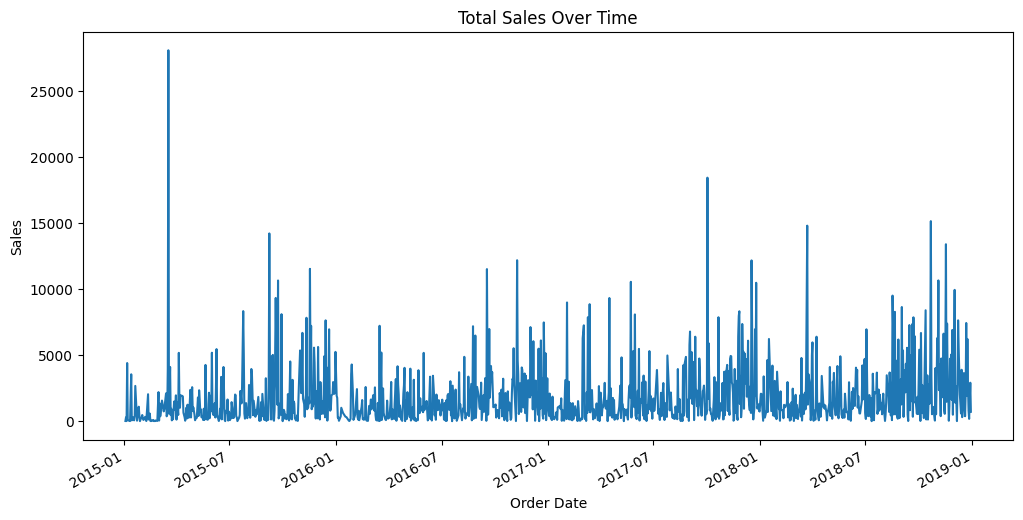

In [12]:
plt.figure(figsize=(12,6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

Sales by Category


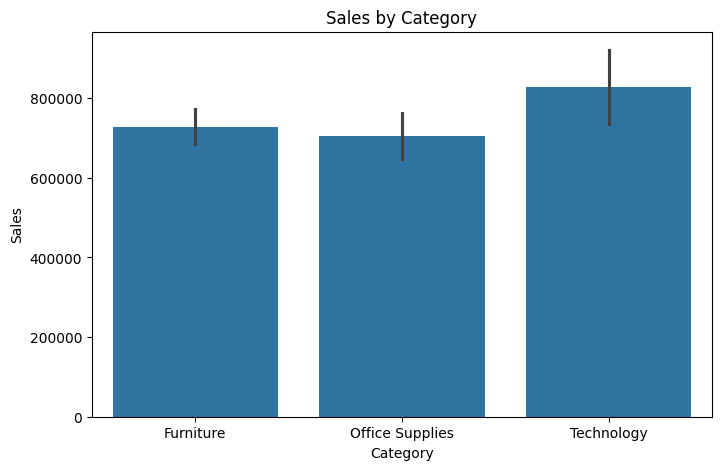

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(data=data, x='Category', y='Sales', estimator=sum)
plt.title('Sales by Category')
plt.show()

Sales by Region

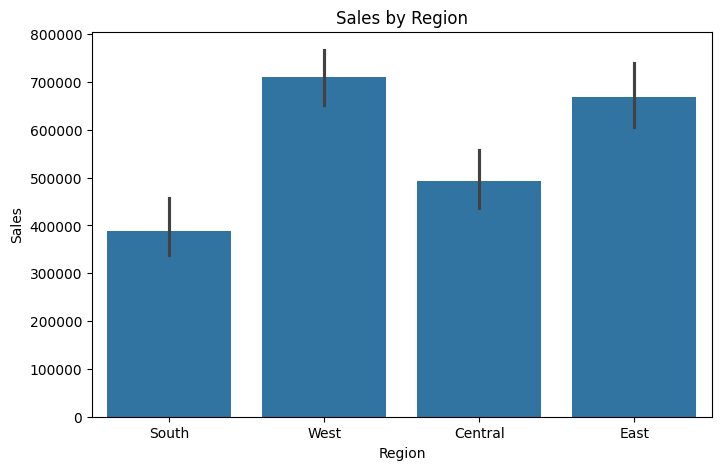

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(data=data, x='Region', y='Sales', estimator=sum)
plt.title('Sales by Region')
plt.show()

Sales by Segment (Customer Segment)

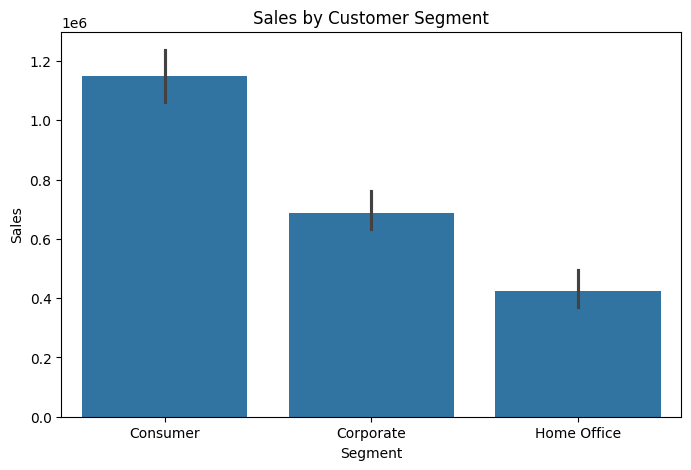

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(data=data, x='Segment', y='Sales', estimator=sum)
plt.title('Sales by Customer Segment')
plt.show()

Top 10 Products by Sales


Top 10 Products by Sales:
 Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


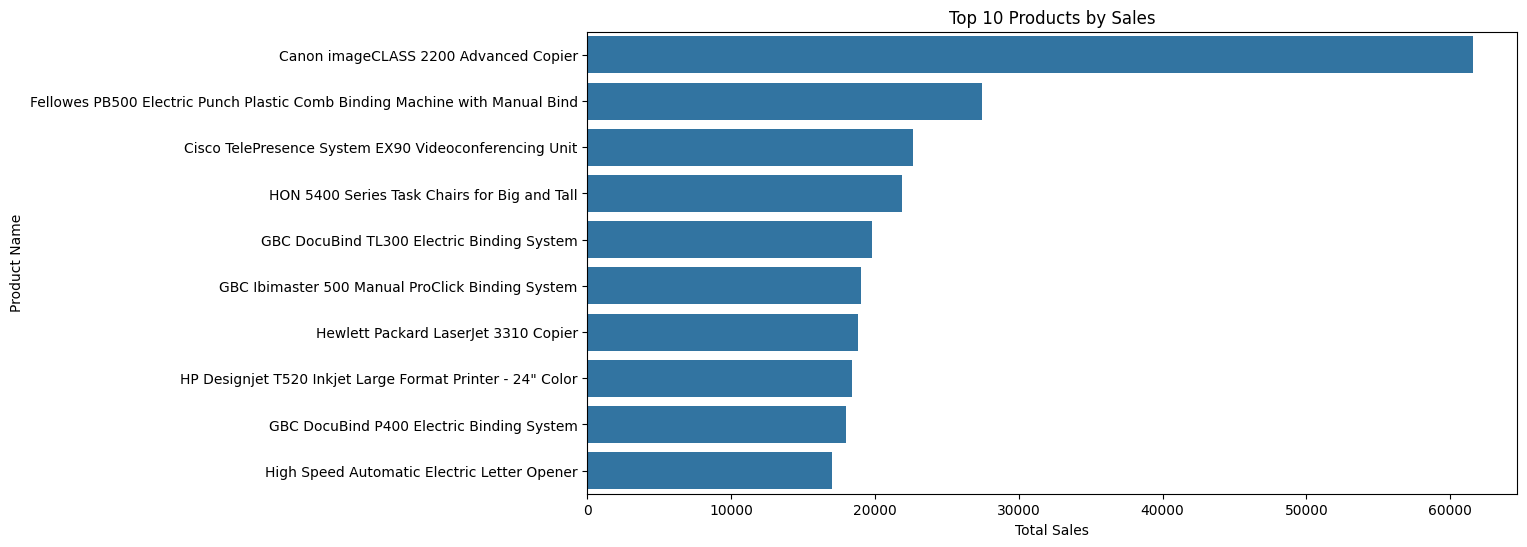

In [17]:
top_products = data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Sales:\n", top_products)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

Correlation Heatmap

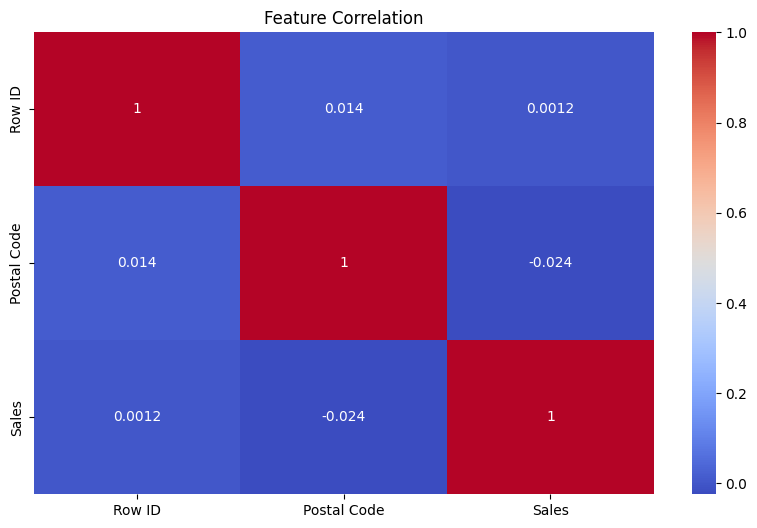

In [19]:
plt.figure(figsize=(10,6))

numeric_data = data.select_dtypes(include=['float64', 'int64'])

sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


insights Summary

In [20]:
print("""
Insights:
- Sales have a seasonal trend over time.
- Technology and Furniture categories have lower sales compared to Office Supplies.
- The East and West regions generate higher sales than Central and South.
- Consumer and Corporate segments perform well, but Home Office lags.
- The top products contribute significantly to overall sales, suggesting focused inventory management.
- Profit and Discount negatively correlate, indicating higher discounts reduce profit.
""")


Insights:
- Sales have a seasonal trend over time.
- Technology and Furniture categories have lower sales compared to Office Supplies.
- The East and West regions generate higher sales than Central and South.
- Consumer and Corporate segments perform well, but Home Office lags.
- The top products contribute significantly to overall sales, suggesting focused inventory management.
- Profit and Discount negatively correlate, indicating higher discounts reduce profit.



Save Cleaned Data

In [21]:
data.to_csv('cleaned_superstore_data.csv', index=False)